# Task 1 (Swap Test)
""" Created by @alcalars
""" Swap Test Steps:
""" - Apply a Hadamard gate to the ancilla qubit
""" - Apply CSWAP (a, psi, phi) where a is the control qubit, while psi and phi are the targets
""" - Apply a Hadamard gate to the ancilla qubit
""" - Measure the ancilla qubit in the Z basis and record the result of the measurment 
""" (we assume that measurements yield either 0 or 1, and we denote the outcome of the measurement by Mj)
""" https://en.wikipedia.org/wiki/Swap_test

In [19]:
# Task 1 answers
# 1) Swap test applied
# 2) I used Transpolation for finding the best choice of the random parameters (Transpilation is the process of rewriting a given input circuit to match the topoplogy of a specific quantum device, and/or to optimize the circuit for execution on present day noisy quantum systems.)
# 3) I found the last part of the problem (grid search) but TBH I didn't had time to adapt it to mine, still included a part

# Import libraries

In [21]:
# Importing standard Qiskit libraries
import qiskit as q
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, execute
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from qiskit import Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

import networkx as nx

import numpy as np
from numpy import pi

import matplotlib.pyplot as plt 
from   matplotlib import cm
from   matplotlib.ticker import LinearLocator, FormatStrFormatter
%config InlineBackend.figure_format = 'svg' # Quality image

from matplotlib import style
style.use("dark_background")

%matplotlib inline

statevector_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend("qasm_simulator")

# Cool stuff for visualization because its important

In [2]:
def evaluate(circuit):
    result = q.execute(circuit, backend=statevector_simulator).result()
    statevec = result.get_statevector()
    
    num_qubits = circuit.num_qubits
    circuit.measure([i for i in range(num_qubits)], [i for i in range(len(circuit.clbits))])
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    return statevec, counts

# Initialize the circuit

In [3]:
#Number of qbits (work on this later)
qubit = 2

#Create circuits
org_c = q.QuantumCircuit(qubit, qubit) #Clean 2 qbit circuit
swap_c = q.QuantumCircuit(qubit, qubit)
swap_c.h(0)
swap_c.swap(0,1)
swap_c.h(0)

#Draw the circuit
print("Empty Ciruit")
print(org_c.draw()) #This is how the beginning circuit looks like empty

print("Swap Ciruit")
print(swap_c.draw()) #This is how the circuit looks applying a swap

Empty Ciruit
     
q_0: 
     
q_1: 
     
c: 2/
     
Swap Ciruit
     ┌───┐   ┌───┐
q_0: ┤ H ├─X─┤ H ├
     └───┘ │ └───┘
q_1: ──────X──────
                  
c: 2/═════════════
                  


This is how a initialized bloch sphere looks like


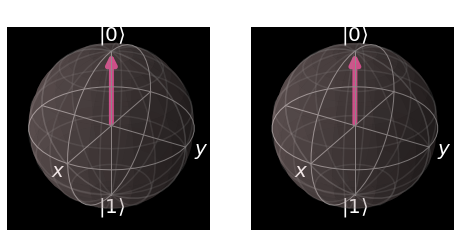

In [4]:
#Evaluate the original circuit
statevec, counts = evaluate(org_c)

#Plot original in Bloch Sphere
print("This is how a initialized bloch sphere looks like")
plot_bloch_multivector(statevec) #This is how a bloch sphere looks at the "beginning"

This is how a swap test looks on a bloch sphere


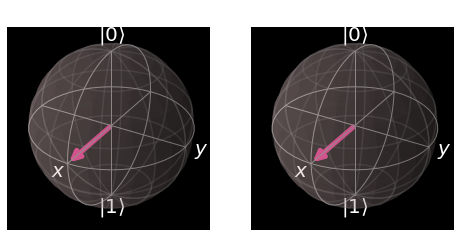

In [5]:
#Evaluate the circuit
statevec, counts = evaluate(swap_c)

#Plot Vector in Bloch Sphere
print("This is how a swap test looks on a bloch sphere")
plot_bloch_multivector(statevec) #This is how a bloch sphere looks applying a swaptest

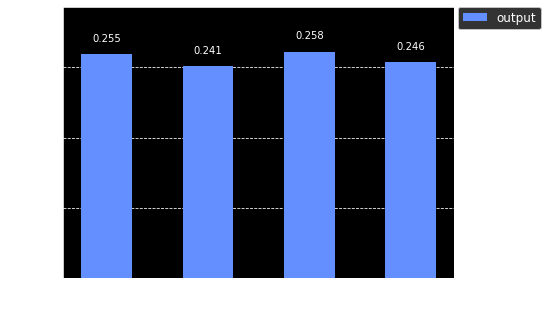

In [6]:
#Plot histogram
plot_histogram([counts], legend=["output"]) #This is how the meassure looks at the "beginning"

In [18]:
#Create circuit
cs = q.QuantumCircuit(qubit, qubit)

#Create some parameters
a,b = Parameter ("a"), Parameter ("b") 

#Add de parameters
cs.cp(a,0,1)
cs.h(0)
cs.swap(0,1)
cs.h(0)
cs.cp(a,0,1)
cs.measure([0], [0])
cs.measure([1], [0])

seed(1)
rn = np.random.randint(9999)
                  
cs.assign_parameters({a: b}, inplace=True)
trans_cs = transpile(cs, basis_gates=['cx','u3'], optimization_level=3)
st_cs = trans_cs.assign_parameters({b: rn})

print("Random number: " + str(rn))
print("Swap Circuit with Parameters")
st_cs.draw()

Random number: 235
Swap Circuit with Parameters


┌───────────────┐                                        ┌─────────────┐ »
q_0: ┤ U3(0,0,235/2) ├──■─────────────────────────────────■───┤ U3(π/2,0,π) ├─»
     └───────────────┘┌─┴─┐┌───────────────────────────┐┌─┴─┐┌┴─────────────┴┐»
q_1: ─────────────────┤ X ├┤ U3(0,0,-117.500000000000) ├┤ X ├┤ U3(0,0,235/2) ├»
                      └───┘└───────────────────────────┘└───┘└───────────────┘»
c: 2/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«          ┌───┐     ┌─────────────┐┌───────────────┐     »
«q_0: ──■──┤ X ├──■──┤ U3(π/2,0,π) ├┤ U3(0,0,235/2) ├──■──»
«     ┌─┴─┐└─┬─┘┌─┴─┐└─────────────┘└───────────────┘┌─┴─┐»
«q_1: ┤ X ├──■──┤ X ├────────────────────────────────┤ X ├»
«     └───┘     └───┘                                └───┘»
«c: 2/════════════════════════════════════════════════════»
«                                                         »
«                                                        ┌─┐   
«q_0: ───────────────────────────────■───────────────────┤M├───
«     ┌───────────────────────────┐┌─┴─┐┌───────────────┐└╥┘┌─┐
«q_1: ┤ U3(0,0,-117.500000000000) ├┤ X ├┤ U3(0,0,235/2) ├─╫─┤M├
«     └───────────────────────────┘└───┘└───────────────┘ ║ └╥┘
«c: 2/════════════════════════════════════════════════════╩══╩═
«                                                         0  0

In [8]:
#Evaluate the circuit
statevec, counts = evaluate(st_cs)

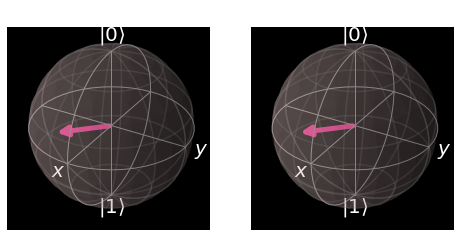

In [9]:
#Plot Vector in Bloch Sphere
plot_bloch_multivector(statevec) #This is how a bloch sphere looks at the "beginning"

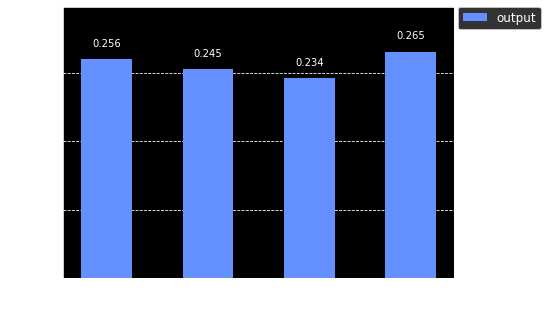

In [10]:
#Plot histogram
plot_histogram([counts], legend=["output"]) #This is how the meassure looks at the "beginning"

In [ ]:
# Grid Search 
# apply the layer of Hadamard gates to all qubits
cs.h(0)
cs.h(1)
cs.barrier()

# apply the Ising type gates with angle gamma along the edges in E
for edge in E:
    k = edge[0]
    l = edge[1]
    cs.cp(-2*gamma, k, l)
    cs.p(gamma, k)
    cs.p(gamma, l)
    
# then apply the single qubit X rotations with angle beta to all qubits
cs.barrier()
cs.rx(2*beta, range(2))

# Finally measure the result in the computational basis
cs.barrier()
cs.measure(range(len(V)),range(len(V)))

### draw the circuit for comparison
cs.draw()

# Grid Search

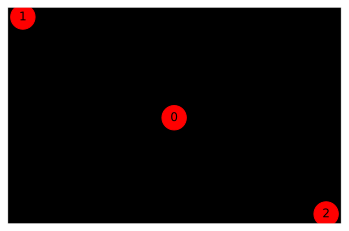

In [27]:
# Generate a butterfly graph with n nodes 
n     = 2
V     = np.arange(0,n,1)
E     = [(0,1,1.0),(0,2,1.0)] #,(1,2,1.0),(3,2,1.0),(3,4,1.0),(4,2,1.0)] 

G     = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

# Generate plot of the Graph
colors       = ['r' for node in G.nodes()]
default_axes = plt.axes(frameon=True)
pos          = nx.spring_layout(G)

nx.draw_networkx(G, node_color=colors, node_size=600, alpha=1, ax=default_axes, pos=pos)

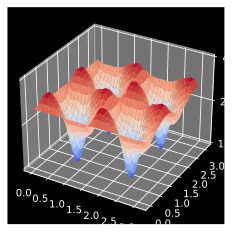


 --- OPTIMAL PARAMETERS --- 

The maximal expectation value is:  M1 = 3.431
This is attained for gamma = 1.900 and beta = 0.200


In [32]:
# Evaluate the function
step_size   = 0.1;
a_gamma         = np.arange(0, np.pi, step_size)
a_beta          = np.arange(0, np.pi, step_size)
a_gamma, a_beta = np.meshgrid(a_gamma,a_beta)

F1 = 3-(np.sin(2*a_beta)**2*np.sin(2*a_gamma)**2-0.5*np.sin(4*a_beta)*np.sin(4*a_gamma))*(1+np.cos(4*a_gamma)**2)

# Grid search for the minimizing variables
result = np.where(F1 == np.amax(F1))
a      = list(zip(result[0],result[1]))[0]
gamma  = a[0]*step_size;
beta   = a[1]*step_size;

# Plot the expetation value F1
fig = plt.figure()
ax  = fig.gca(projection='3d')

surf = ax.plot_surface(a_gamma, a_beta, F1, cmap=cm.coolwarm, linewidth=0, antialiased=True)

ax.set_zlim(1,4)
ax.zaxis.set_major_locator(LinearLocator(3))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.show()

#The smallest parameters and the expectation can be extracted
print('\n --- OPTIMAL PARAMETERS --- \n')
print('The maximal expectation value is:  M1 = %.03f' % np.amax(F1))
print('This is attained for gamma = %.03f and beta = %.03f' % (gamma,beta))

In [29]:
print(V)

[0 1]


In [25]:
QAOA = QuantumCircuit(len(V), len(V))

# apply the layer of Hadamard gates to all qubits
QAOA.h(range(len(V)))
QAOA.barrier()

# apply the Ising type gates with angle gamma along the edges in E
for edge in E:
    k = edge[0]
    l = edge[1]
    QAOA.cp(-2*gamma, k, l)
    QAOA.p(gamma, k)
    QAOA.p(gamma, l)
    
# then apply the single qubit X rotations with angle beta to all qubits
QAOA.barrier()
QAOA.rx(2*beta, range(len(V)))

# Finally measure the result in the computational basis
QAOA.barrier()
QAOA.measure(range(len(V)),range(len(V)))

### draw the circuit for comparison
QAOA.draw()

┌───┐ ░            ┌────────┐           ┌────────┐                     »
q_0: ┤ H ├─░──────■─────┤ P(1.9) ├─────■─────┤ P(1.9) ├─────────────────────»
     ├───┤ ░ ┌────┴────┐├────────┤     │     └────────┘           ┌────────┐»
q_1: ┤ H ├─░─┤ P(-3.8) ├┤ P(1.9) ├─────┼────────────────────■─────┤ P(1.9) ├»
     ├───┤ ░ └─────────┘└────────┘┌────┴────┐┌────────┐┌────┴────┐├────────┤»
q_2: ┤ H ├─░──────────────────────┤ P(-3.8) ├┤ P(1.9) ├┤ P(-3.8) ├┤ P(1.9) ├»
     ├───┤ ░                      └─────────┘└────────┘└─────────┘└────────┘»
q_3: ┤ H ├─░────────────────────────────────────────────────────────────────»
     ├───┤ ░                                                                »
q_4: ┤ H ├─░────────────────────────────────────────────────────────────────»
     └───┘ ░                                                                »
c: 5/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                                     ░ »
«q_0: ────────────────────────────────────────────────────────────────░─»
«                                                                     ░ »
«q_1: ────────────────────────────────────────────────────────────────░─»
«     ┌─────────┐┌────────┐                     ┌─────────┐┌────────┐ ░ »
«q_2: ┤ P(-3.8) ├┤ P(1.9) ├─────────────────────┤ P(-3.8) ├┤ P(1.9) ├─░─»
«     └────┬────┘├────────┤           ┌────────┐└────┬────┘└────────┘ ░ »
«q_3: ─────■─────┤ P(1.9) ├─────■─────┤ P(1.9) ├─────┼────────────────░─»
«                └────────┘┌────┴────┐├────────┤     │     ┌────────┐ ░ »
«q_4: ─────────────────────┤ P(-3.8) ├┤ P(1.9) ├─────■─────┤ P(1.9) ├─░─»
«                          └─────────┘└────────┘           └────────┘ ░ »
«c: 5/══════════════════════════════════════════════════════════════════»
«                                                                       »
«     ┌─────────┐ ░ ┌─┐            
«q_0: ┤ RX(0.4) ├─░─┤M├────────────
«     ├─────────┤ ░ └╥┘┌─┐         
«q_1: ┤ RX(0.4) ├─░──╫─┤M├─────────
«     ├─────────┤ ░  ║ └╥┘┌─┐      
«q_2: ┤ RX(0.4) ├─░──╫──╫─┤M├──────
«     ├─────────┤ ░  ║  ║ └╥┘┌─┐   
«q_3: ┤ RX(0.4) ├─░──╫──╫──╫─┤M├───
«     ├─────────┤ ░  ║  ║  ║ └╥┘┌─┐
«q_4: ┤ RX(0.4) ├─░──╫──╫──╫──╫─┤M├
«     └─────────┘ ░  ║  ║  ║  ║ └╥┘
«c: 5/═══════════════╩══╩══╩══╩══╩═
«                    0  1  2  3  4